# Lesson 8: Unsupervised Learning 

### Example: Computing the centroid of points

In [1]:
# centroid calculation 
import numpy as np 
red_point1 = np.array([1, 3]) 
red_point2 = np.array([2, 5]) 
red_point3 = np.array([3, 4])
 
red_center = (red_point1 + red_point2 + red_point3) / 3. 
 
red_center  
# array([ 2.,  4.]) 


array([2., 4.])

### Example: K-Means Clustering

In [2]:
import pandas as pd
# import the beer dataset 
url = 'beer.txt' 
#https://github.com/sinanuozdemir/sfdat28/blob/master/data/beer.txt
beer = pd.read_csv(url, sep=' ') 
print(beer.shape) 
(20, 5) 
 
beer.head() 

(20, 5)


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [3]:
# define X 
X = beer.drop('name', axis=1)

In [4]:
# K-means with 3 clusters 
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3, random_state=1) 
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [5]:
# save the cluster labels and sort by cluster 
beer['cluster'] = km.labels_

In [6]:
# calculate the mean of each feature for each cluster 
beer.groupby('cluster').mean() 

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


Text(0, 0.5, 'alcohol')

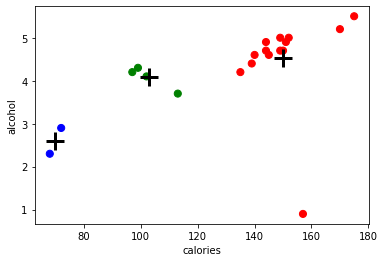

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
 
 
# save the DataFrame of cluster centers 
centers = beer.groupby('cluster').mean() 
# create a "colors" array for plotting 
colors = np.array(['red', 'green', 'blue', 'yellow']) 
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue) 
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50) 
 
# cluster centers, marked by "+" 
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black') 
 
# add labels 
plt.xlabel('calories') 
plt.ylabel('alcohol') 


In [8]:
# calculate Silhouette Coefficient for K=3 
from sklearn import metrics 
metrics.silhouette_score(X, km.labels_) 
0.4578 

0.4578

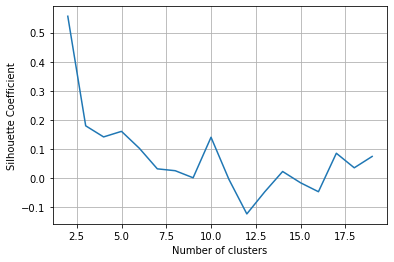

In [9]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn import metrics
# calculate SC for K=2 through K=19 
k_range = range(2, 20) 
scores = [] 
for k in k_range: 
    km = KMeans(n_clusters=k, random_state=1) 
    km.fit(X_scaled) 
    scores.append(metrics.silhouette_score(X, km.labels_)) 
 
# plot the results 
plt.plot(k_range, scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Coefficient') 
plt.grid(True) 

In [10]:
scores

[0.5562170983766765,
 0.1797806808940007,
 0.1416330750786457,
 0.16075571189127968,
 0.10241451069739105,
 0.03196363269037656,
 0.025545363125542,
 0.0012676416200376795,
 0.14047649703217518,
 -0.004212770262278174,
 -0.12288972888884198,
 -0.04699156816858644,
 0.02286077529646228,
 -0.01590900923740633,
 -0.046645933770360005,
 0.08550601418013953,
 0.035535387393369686,
 0.07457858794811631]

In [11]:
# center and scale the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
 
# K-means with 3 clusters on scaled data 
km = KMeans(n_clusters=3, random_state=1) 
km.fit(X_scaled) 

KMeans(n_clusters=3, random_state=1)

### Example: Feature Extraction

In [12]:
url = 'yelp.csv' 
yelp = pd.read_csv(url, encoding='unicode-escape') 
 
# create a new DataFrame that only contains the 5-star and 1-star reviews 
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)] 
 
# define X and y 
X = yelp_best_worst.text 
y = yelp_best_worst.stars == 5 


In [13]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [14]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100) 
# Make our training and testing sets 
 
vect = CountVectorizer(stop_words='english') 
# Count the number of words but remove stop words like a, an, the, you, etc 
 
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test) 
# transform our text into document term matrices 
 
lr.fit(X_train_dtm, y_train) 
# fit to our training set 
 
lr.score(X_test_dtm, y_test) 
# score on our testing set 
0.91193737 


0.91193737

In [15]:
vect = CountVectorizer(stop_words='english', max_features=100) 
# Only use the 100 most used words 
 
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test) 
print(X_test_dtm.shape)  # (1022, 100) 

(1022, 100)


In [16]:
from sklearn import decomposition 
# We will be creating 100 super columns 
 
vect = CountVectorizer(stop_words='english') 
# Don't ignore any words 
pca  = decomposition.PCA(n_components=100) 
# instantate a pca object 
 
X_train_dtm = vect.fit_transform(X_train).todense() 
# A dense matrix is required to pass into PCA, does not affect the overall message 
X_train_dtm = pca.fit_transform(X_train_dtm) 
 
X_test_dtm = vect.transform(X_test).todense() 
X_test_dtm = pca.transform(X_test_dtm) 
print( X_test_dtm.shape)  # (1022, 100) 
 
 
lr.fit(X_train_dtm, y_train) 
 
lr.score(X_test_dtm, y_test) 
.89628 


C:\Users\Qubits\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Qubits\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(1022, 100)


0.89628

### Example: Facial Recognition

In [17]:
from sklearn.datasets import fetch_lfw_people 
 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) 
 
# introspect the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
 
# for machine learning we use the 2 data directly (as relative pixel 
# positions info is ignored by this model) 
X = lfw_people.data 
y = lfw_people.target 
n_features = X.shape[1] 
 
X.shape

(1288, 1850)

'Hugo Chavez'

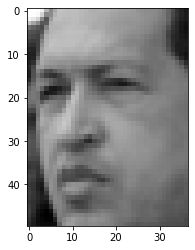

In [18]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray) 
lfw_people.target_names[y[0]] 
'Hugo Chavez' 


'George W Bush'

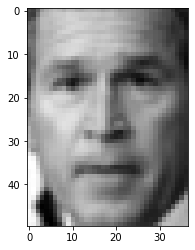

In [19]:
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray) 
lfw_people.target_names[y[100]] 
'George W Bush'

In [20]:
# the label to predict is the id of the person 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 
 
print("Total dataset size:") 
print("n_samples: %d" % n_samples) 
print("n_features: %d" % n_features) 
print("n_classes: %d" % n_classes) 
 


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from time import time  # for timing our work 
 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.25, random_state=1) 
# get our training and test set 
 
t0 = time() # get the time now 
logreg = LogisticRegression() 
 
logreg.fit(X_train, y_train) 
 
# Predicting people's names on the test set 
y_pred = logreg.predict(X_test) 
 
 
print( accuracy_score(y_pred, y_test), "Accuracy") 
print( (time() - t0), "seconds" )


0.8322981366459627 Accuracy
0.7969920635223389 seconds


C:\Users\Qubits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:

# split into a training and testing set# split i 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)
# will use x_test as sample OOS data

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 200

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 200 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis


In [23]:
t0 = time() 
 
# Predicting people's names on the test set WITH PCA 
logreg.fit(X_train_pca, y_train) 
y_pred = logreg.predict(X_test_pca) 
 
print( accuracy_score(y_pred, y_test), "Accuracy" )
print( (time() - t0), "seconds" )
 


0.7888198757763976 Accuracy
0.12299966812133789 seconds


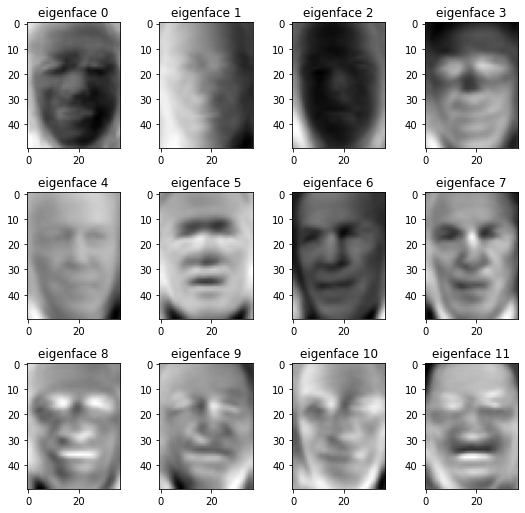

In [24]:
def plot_gallery(images, titles, n_row=3, n_col=4): 
    """Helper function to plot a gallery of portraits""" 
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i], cmap=plt.cm.gray) 
        plt.title(titles[i], size=12) 
 
# plot the gallery of the most significative eigenfaces 
eigenfaces = pca.components_.reshape((n_components, h, w)) 
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])] 
plot_gallery(eigenfaces, eigenface_titles) 
 
plt.show() 
 